#### Produce the PSL anomaly maps for each WT 
Ming Ge Oct 2024

In [3]:
import sys
import datetime
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import glob 
import os.path
import cartopy 
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# inorder to import my pathon module, add
# $PYTHONPATH for jupyter for module
sys.path.append("/glade/u/home/mingge/PYTHON")
import coexist_func 
from importlib import reload
reload(coexist_func)

from coexist_func import plot_prec_12_erai
from coexist_func import cal_prec_cli_smyle
from coexist_func import cal_prec_cli_wt_smyle
from coexist_func import cal_season_cli_smyle_prec
from coexist_func import cal_season_ano_smyle_prec

In [4]:
# centroid_ana.ibynb, wt_hist_smyle_era5.ipynb
sCentroids='/glade/u/home/mingge/WTing_existing-centroids/CONUS-WTs_existing_centroids.npz'
DATA=np.load(sCentroids)
rgrCentroids=DATA['rgrCentroids']               # (12, 3, 24, 74)
rgiWTs=range(1, rgrCentroids.shape[0]+1, 1)     # number of WT 

lat_s = DATA['rgrLatWT'].min() - 6
lat_e = DATA['rgrLatWT'].max() + 2
lon_s = DATA['rgrLonWT'].min() + 360
lon_e = DATA['rgrLonWT'].max() + 360 + 6
print('lat:', lat_s , '-', lat_e, 'lon:', lon_s, '-', lon_e)

season_dict = {
    'DJF': [12,1,2],
    'MAM': [3,4,5],
    'JJA': [6,7,8],
    'SON': [9,10,11],
    'JAS': [7,8,9]}

n_season = len(season_dict)
n_season = 4

lat: 24.75 - 50.0 lon: 234.75 - 295.5


In [5]:
dir_smyle = '/glade/campaign/cesm/development/espwg/SMYLE/archive/'
dir_o  = '/glade/campaign/mmm/c3we/mingge/COEXIST/SMYLE/' 
dir_wt = '/glade/campaign/mmm/c3we/mingge/COEXIST/SMYLE/WT_init/'

year_s = 1979
year_e = 2019
n_year = year_e - year_s + 1

n_mem = 20
 
ini_s = ['02', '05', '08', '11']
n_ini = len(ini_s)

#### calculate prec climatology

In [6]:
# get dimension size info
flnm = dir_smyle + 'b.e21.BSMYLE.f09_g17.2003-02.019/atm/proc/tseries/day_1/b.e21.BSMYLE.f09_g17.2003-02.019.cam.h1.PSL.20030201-20050131.nc'
with  xr.open_dataset(flnm) as ds:
    psl = ds.PSL.sel(lat=slice(lat_s, lat_e),lon=slice(lon_s, lon_e))
    lat = ds.lat.sel(lat=slice(lat_s, lat_e))
    lon = ds.lon.sel(lon=slice(lon_s, lon_e))
    n_lat = len(lat)
    n_lon = len(lon)  
    n_fcst =  ds.dims['time']        

/glade/derecho/scratch/mingge/tmp/ipykernel_18737/1729998512.py:9: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  n_fcst =  ds.dims['time']


In [7]:
%%time
# 45min
flnm_o = dir_o + 'psl_clim_large.nc'
psl_clim_xr = cal_prec_cli_smyle(dir_smyle, n_lat, n_lon, year_s, year_e, lat_s, lat_e, lon_s, lon_e, flnm_o, 'psl')

/glade/campaign/mmm/c3we/mingge/COEXIST/SMYLE/psl_clim_large.nc exist
CPU times: user 4.7 ms, sys: 0 ns, total: 4.7 ms
Wall time: 25.6 ms


#### precipitation climatology of WTs

In [8]:
%%time
flnm_cli =  dir_o + 'psl_clim_large.nc'
 
cal_prec_cli_wt_smyle(dir_smyle, dir_wt,  year_s, year_e, lat, lon, lat_s, lat_e, lon_s, lon_e, 'psl')

/glade/campaign/mmm/c3we/mingge/COEXIST/SMYLE/psl_wt_01.nc exist
/glade/campaign/mmm/c3we/mingge/COEXIST/SMYLE/psl_wt_02.nc exist
/glade/campaign/mmm/c3we/mingge/COEXIST/SMYLE/psl_wt_03.nc exist
/glade/campaign/mmm/c3we/mingge/COEXIST/SMYLE/psl_wt_04.nc exist
/glade/campaign/mmm/c3we/mingge/COEXIST/SMYLE/psl_wt_05.nc exist
/glade/campaign/mmm/c3we/mingge/COEXIST/SMYLE/psl_wt_06.nc exist
/glade/campaign/mmm/c3we/mingge/COEXIST/SMYLE/psl_wt_07.nc exist
/glade/campaign/mmm/c3we/mingge/COEXIST/SMYLE/psl_wt_08.nc exist
/glade/campaign/mmm/c3we/mingge/COEXIST/SMYLE/psl_wt_09.nc exist
/glade/campaign/mmm/c3we/mingge/COEXIST/SMYLE/psl_wt_10.nc exist
/glade/campaign/mmm/c3we/mingge/COEXIST/SMYLE/psl_wt_11.nc exist
/glade/campaign/mmm/c3we/mingge/COEXIST/SMYLE/psl_wt_12.nc exist
/glade/campaign/mmm/c3we/mingge/COEXIST/SMYLE/psl_wt_13.nc exist
/glade/campaign/mmm/c3we/mingge/COEXIST/SMYLE/psl_wt_14.nc exist
/glade/campaign/mmm/c3we/mingge/COEXIST/SMYLE/psl_wt_15.nc exist
/glade/campaign/mmm/c3we/

#### ensemble average SLP maps for each WT

https://www.frontiersin.org/articles/10.3389/fenvs.2019.00036/full

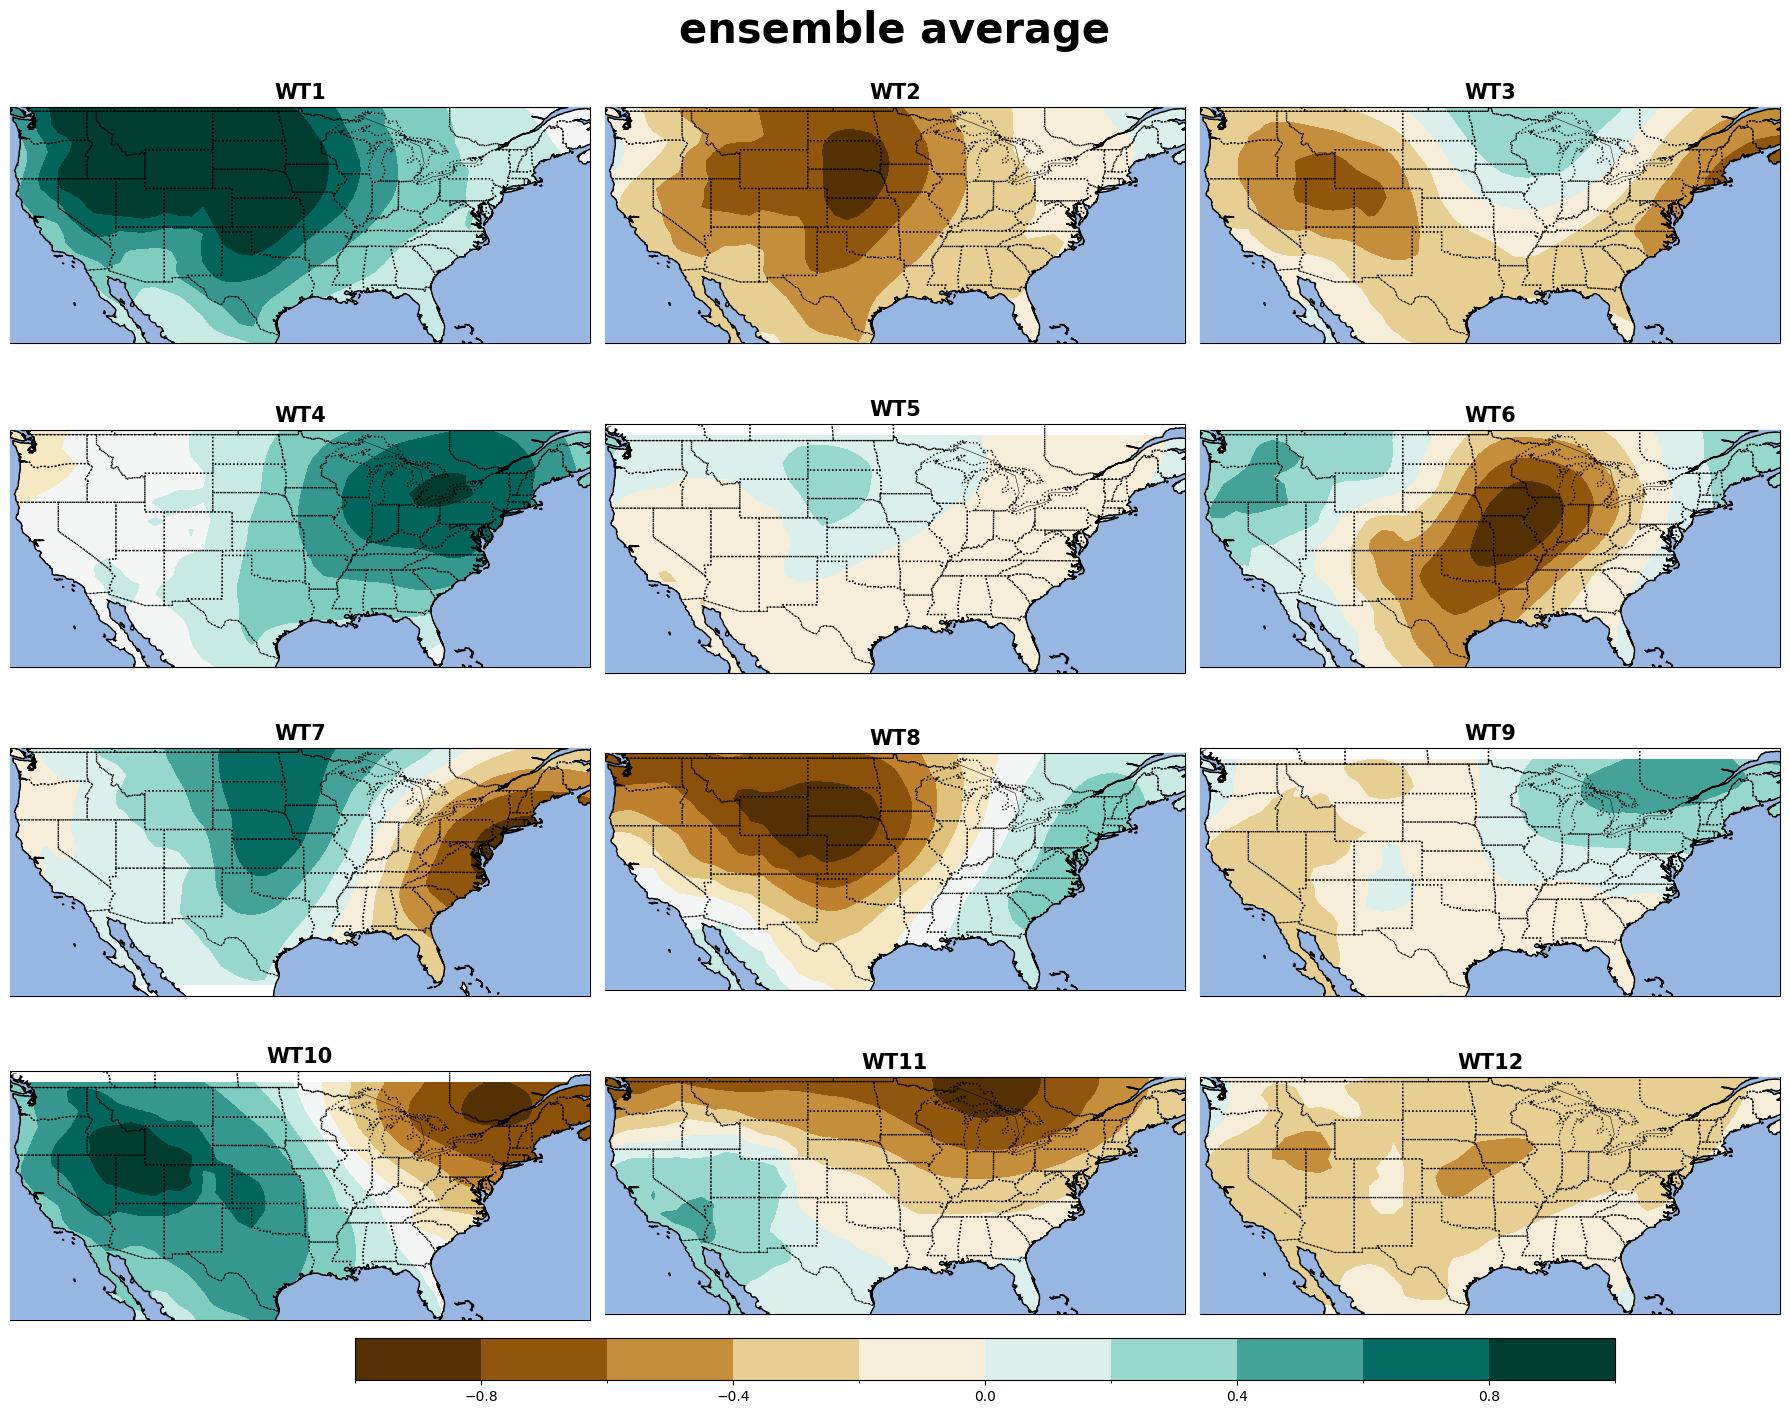

In [8]:
flnm_cli = '/glade/campaign/mmm/c3we/mingge/COEXIST/SMYLE/psl_clim_large.nc'
with  xr.open_dataset(flnm_cli) as ds_cli:
    prec_cli = ds_cli.PSL

n_lat = prec_cli.shape[0]
n_lon = prec_cli.shape[1]

for mem in range(1, n_mem+1,1):
    mem_s = str(mem).zfill(2)
    flnm_wt = '/glade/campaign/mmm/c3we/mingge/COEXIST/SMYLE/psl_wt_' + mem_s + '.nc'
    #print(flnm_wt)
    
    with  xr.open_dataset(flnm_wt) as ds_prec:
        prec_wt = ds_prec.__xarray_dataarray_variable__
        if mem == 1:
            prec_avg = prec_wt.copy()
        else:
            prec_avg = prec_avg + prec_wt

prec_avg = (prec_avg*0.05 - prec_cli)/prec_cli*100
plot_prec_12_erai(prec_avg, -1, 1, 11, 'BrBG', 'horizontal', 'ensemble average')

#### 2) PSL seasonal anomaly of SMYLE
- 2.1) seasonal climatology

In [9]:
flnm_cli = dir_o + 'psl_seasonal_cli.nc'
prec_cli_xr = cal_season_cli_smyle_prec('PSL', dir_smyle, season_dict, year_s, year_e, lat, lon, lat_s, lat_e, lon_s, lon_e, flnm_cli)

/glade/campaign/mmm/c3we/mingge/COEXIST/SMYLE/psl_seasonal_cli.nc exist
FrozenMappingWarningOnValuesAccess({'lat': 27, 'lon': 49, 'season': 4})


-2.2) seasonal anomaly

In [10]:
flnm_cli = dir_o + 'psl_seasonal_cli.nc'
flnm_o = dir_o + 'psl_seasonal_ano.nc'
cal_season_ano_smyle_prec('PSL', dir_smyle, dir_wt, season_dict, year_s, year_e, lat, lon, lat_s, lat_e, lon_s, lon_e, flnm_cli)

/glade/campaign/mmm/c3we/mingge/COEXIST/SMYLE/WT_init/psl_seasonal_ano_mem001.nc exist
/glade/campaign/mmm/c3we/mingge/COEXIST/SMYLE/WT_init/psl_seasonal_ano_mem002.nc exist
/glade/campaign/mmm/c3we/mingge/COEXIST/SMYLE/WT_init/psl_seasonal_ano_mem003.nc exist
/glade/campaign/mmm/c3we/mingge/COEXIST/SMYLE/WT_init/psl_seasonal_ano_mem004.nc exist
/glade/campaign/mmm/c3we/mingge/COEXIST/SMYLE/WT_init/psl_seasonal_ano_mem005.nc exist
/glade/campaign/mmm/c3we/mingge/COEXIST/SMYLE/WT_init/psl_seasonal_ano_mem006.nc exist
/glade/campaign/mmm/c3we/mingge/COEXIST/SMYLE/WT_init/psl_seasonal_ano_mem007.nc exist
/glade/campaign/mmm/c3we/mingge/COEXIST/SMYLE/WT_init/psl_seasonal_ano_mem008.nc exist
/glade/campaign/mmm/c3we/mingge/COEXIST/SMYLE/WT_init/psl_seasonal_ano_mem009.nc exist
/glade/campaign/mmm/c3we/mingge/COEXIST/SMYLE/WT_init/psl_seasonal_ano_mem010.nc exist
/glade/campaign/mmm/c3we/mingge/COEXIST/SMYLE/WT_init/psl_seasonal_ano_mem011.nc exist
/glade/campaign/mmm/c3we/mingge/COEXIST/SMY

In [16]:
dir_smyle

'/glade/campaign/cesm/development/espwg/SMYLE/archive/'

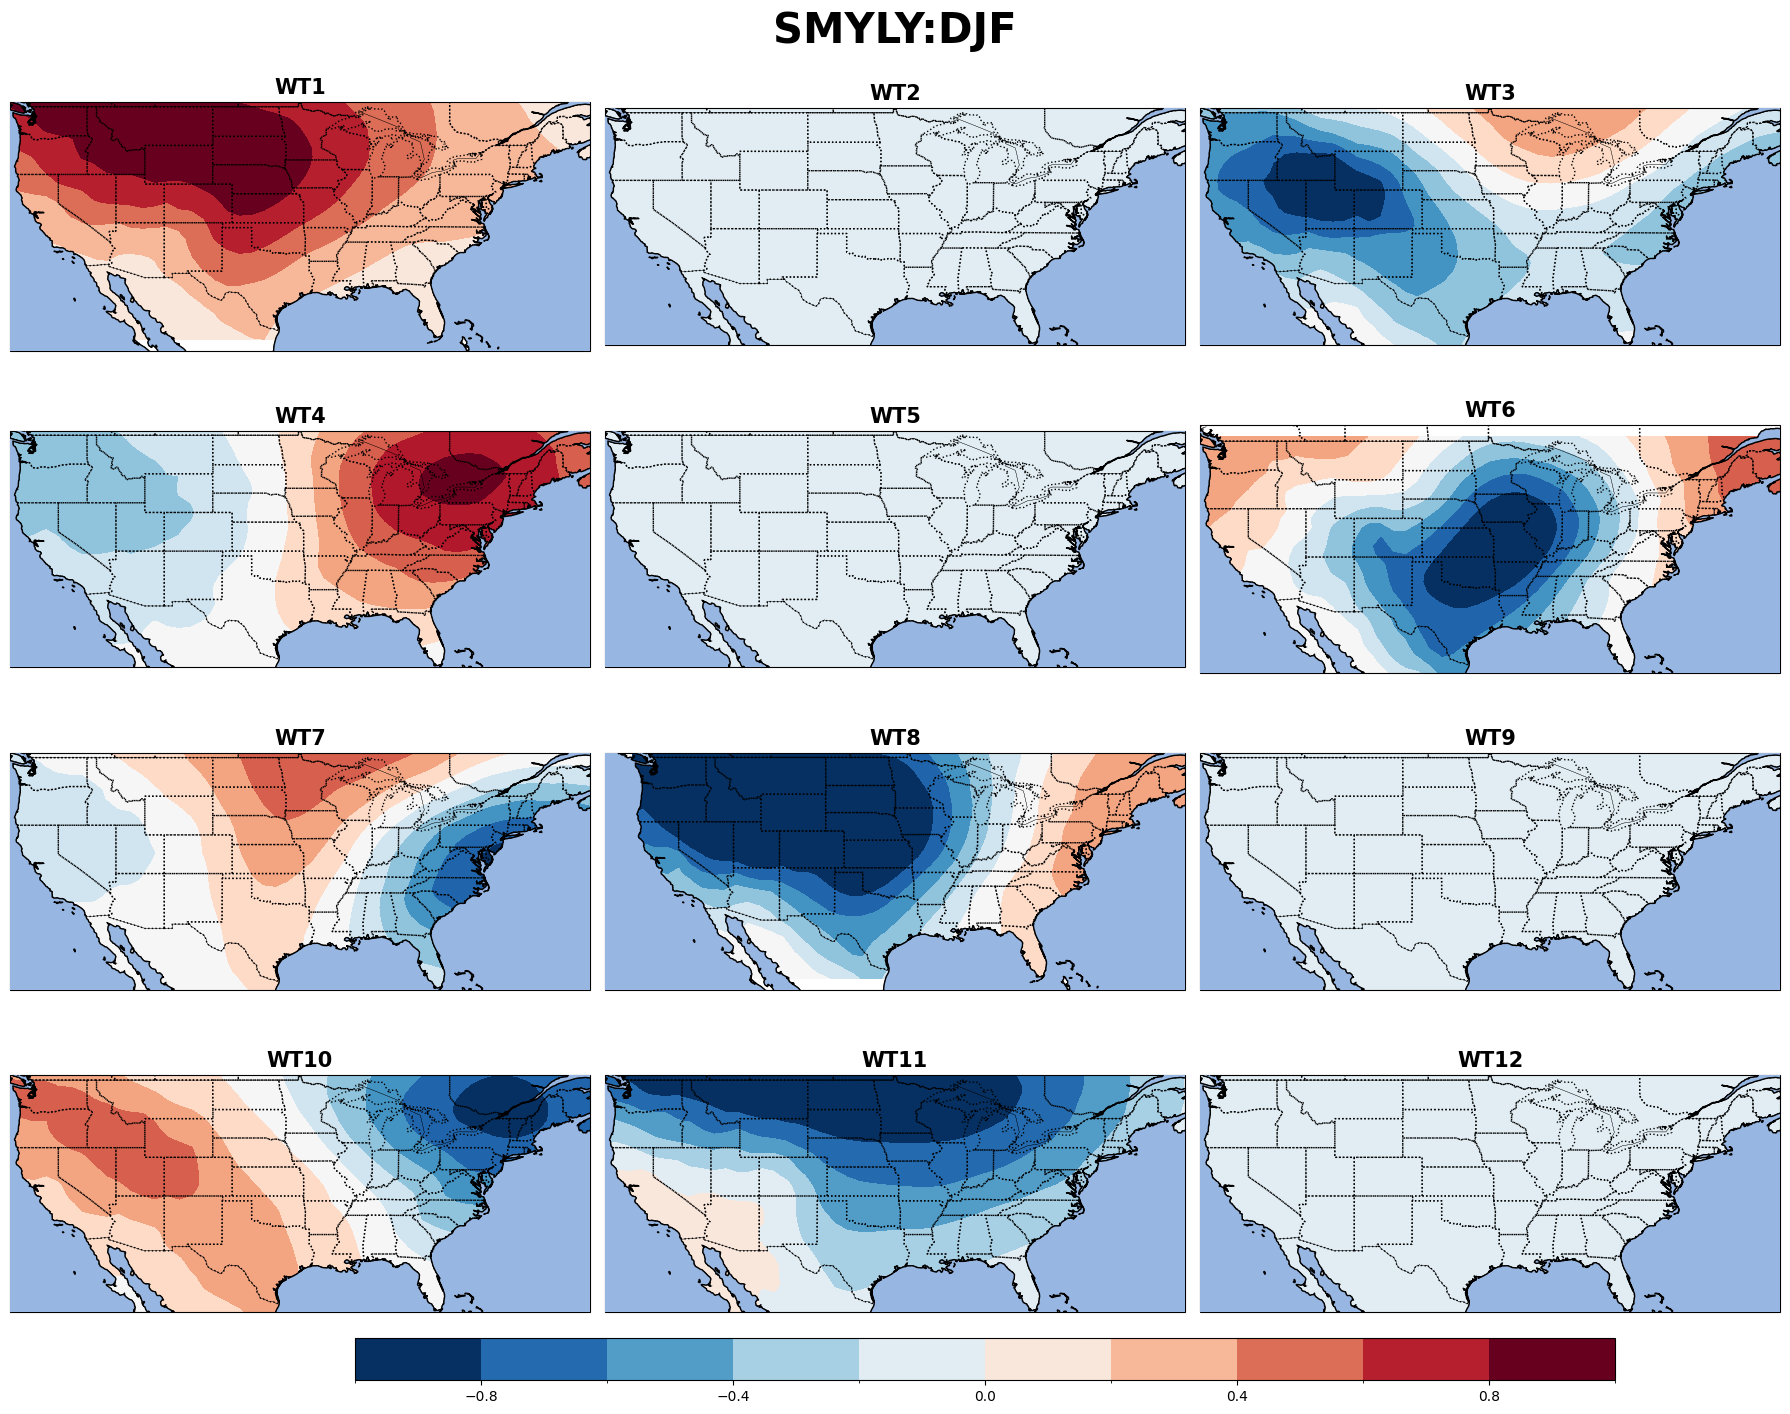

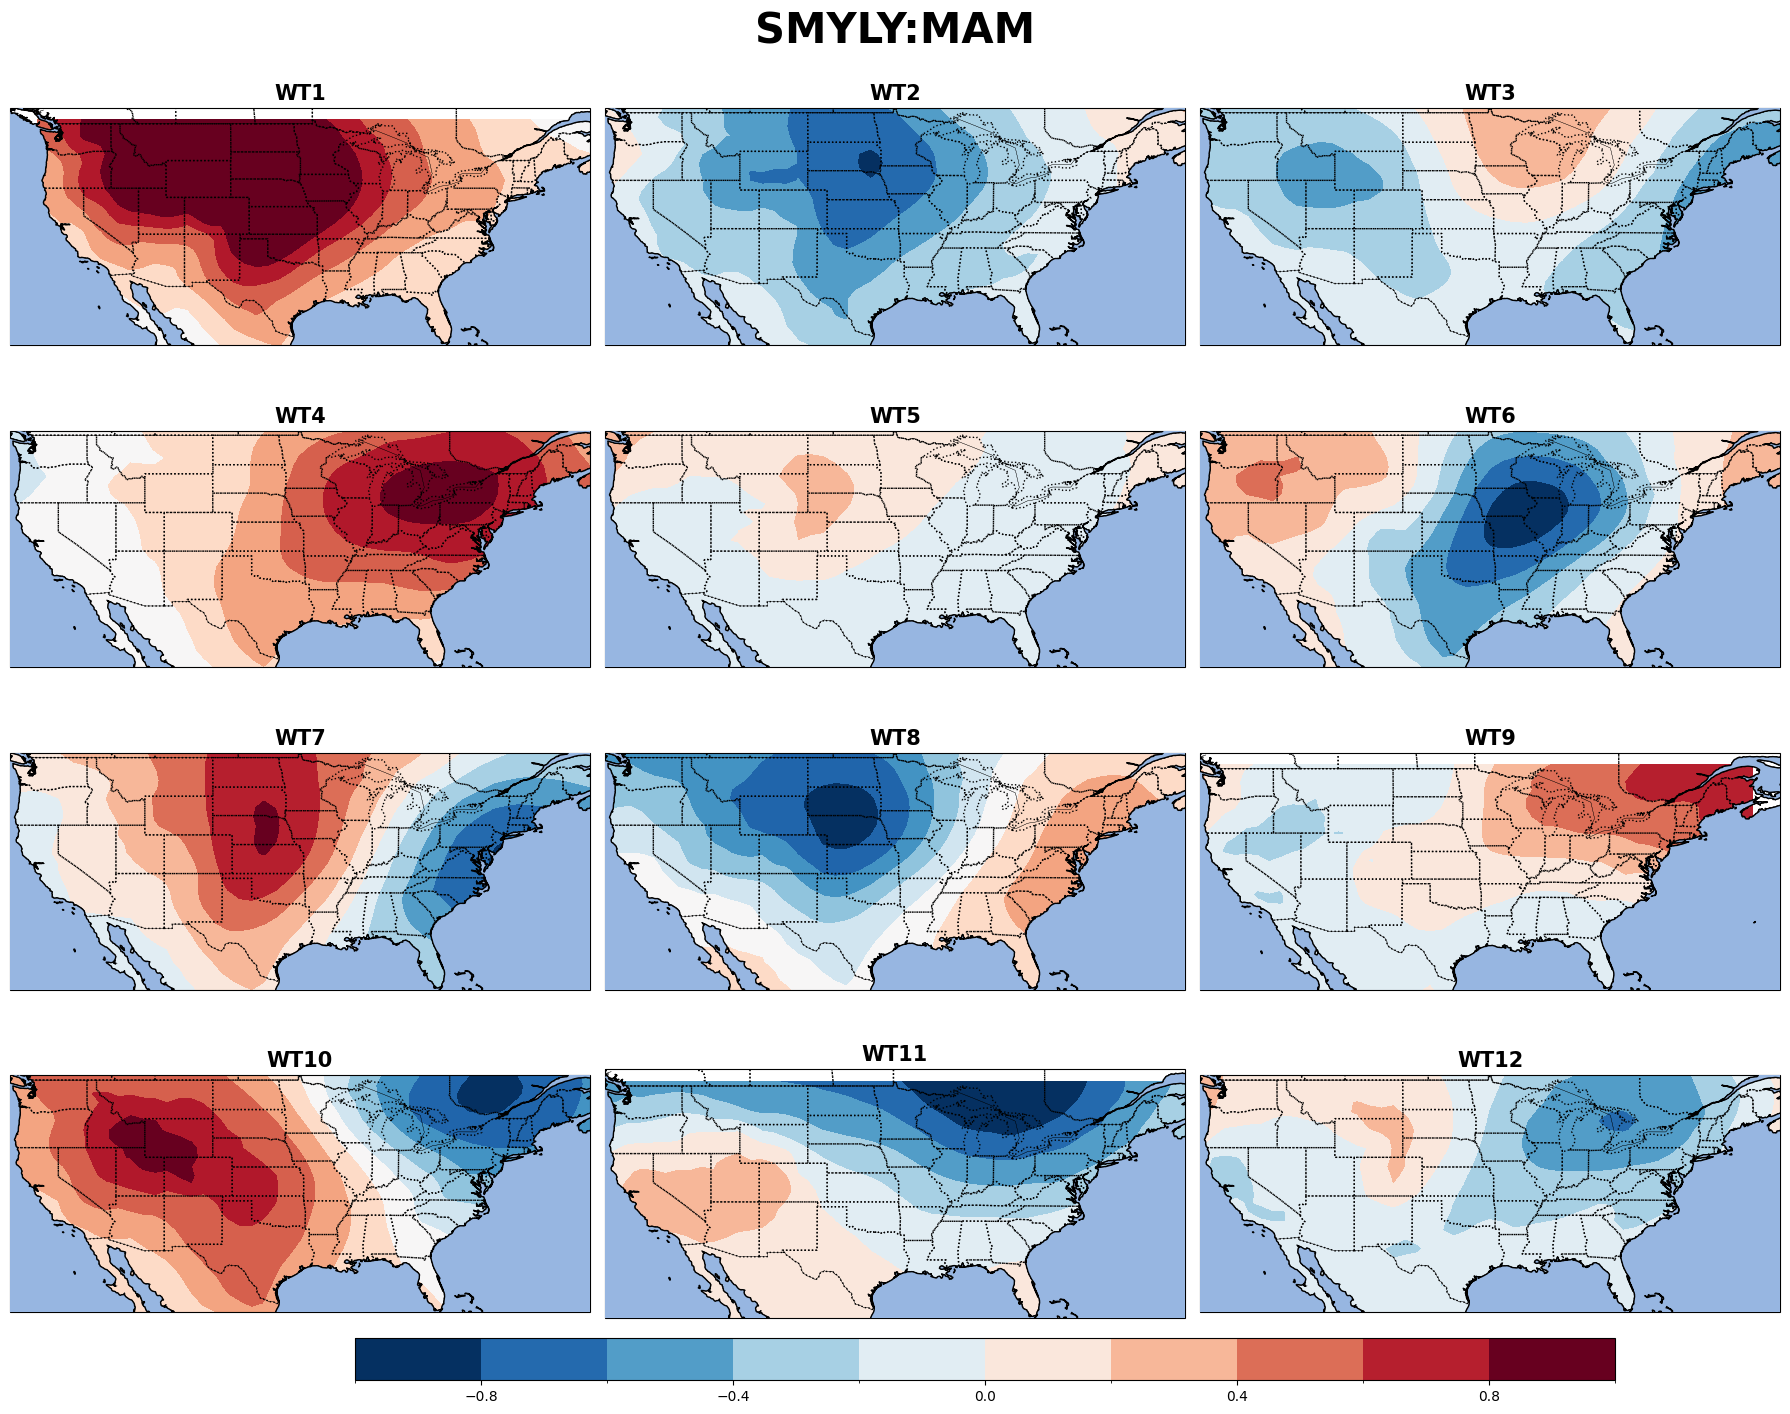

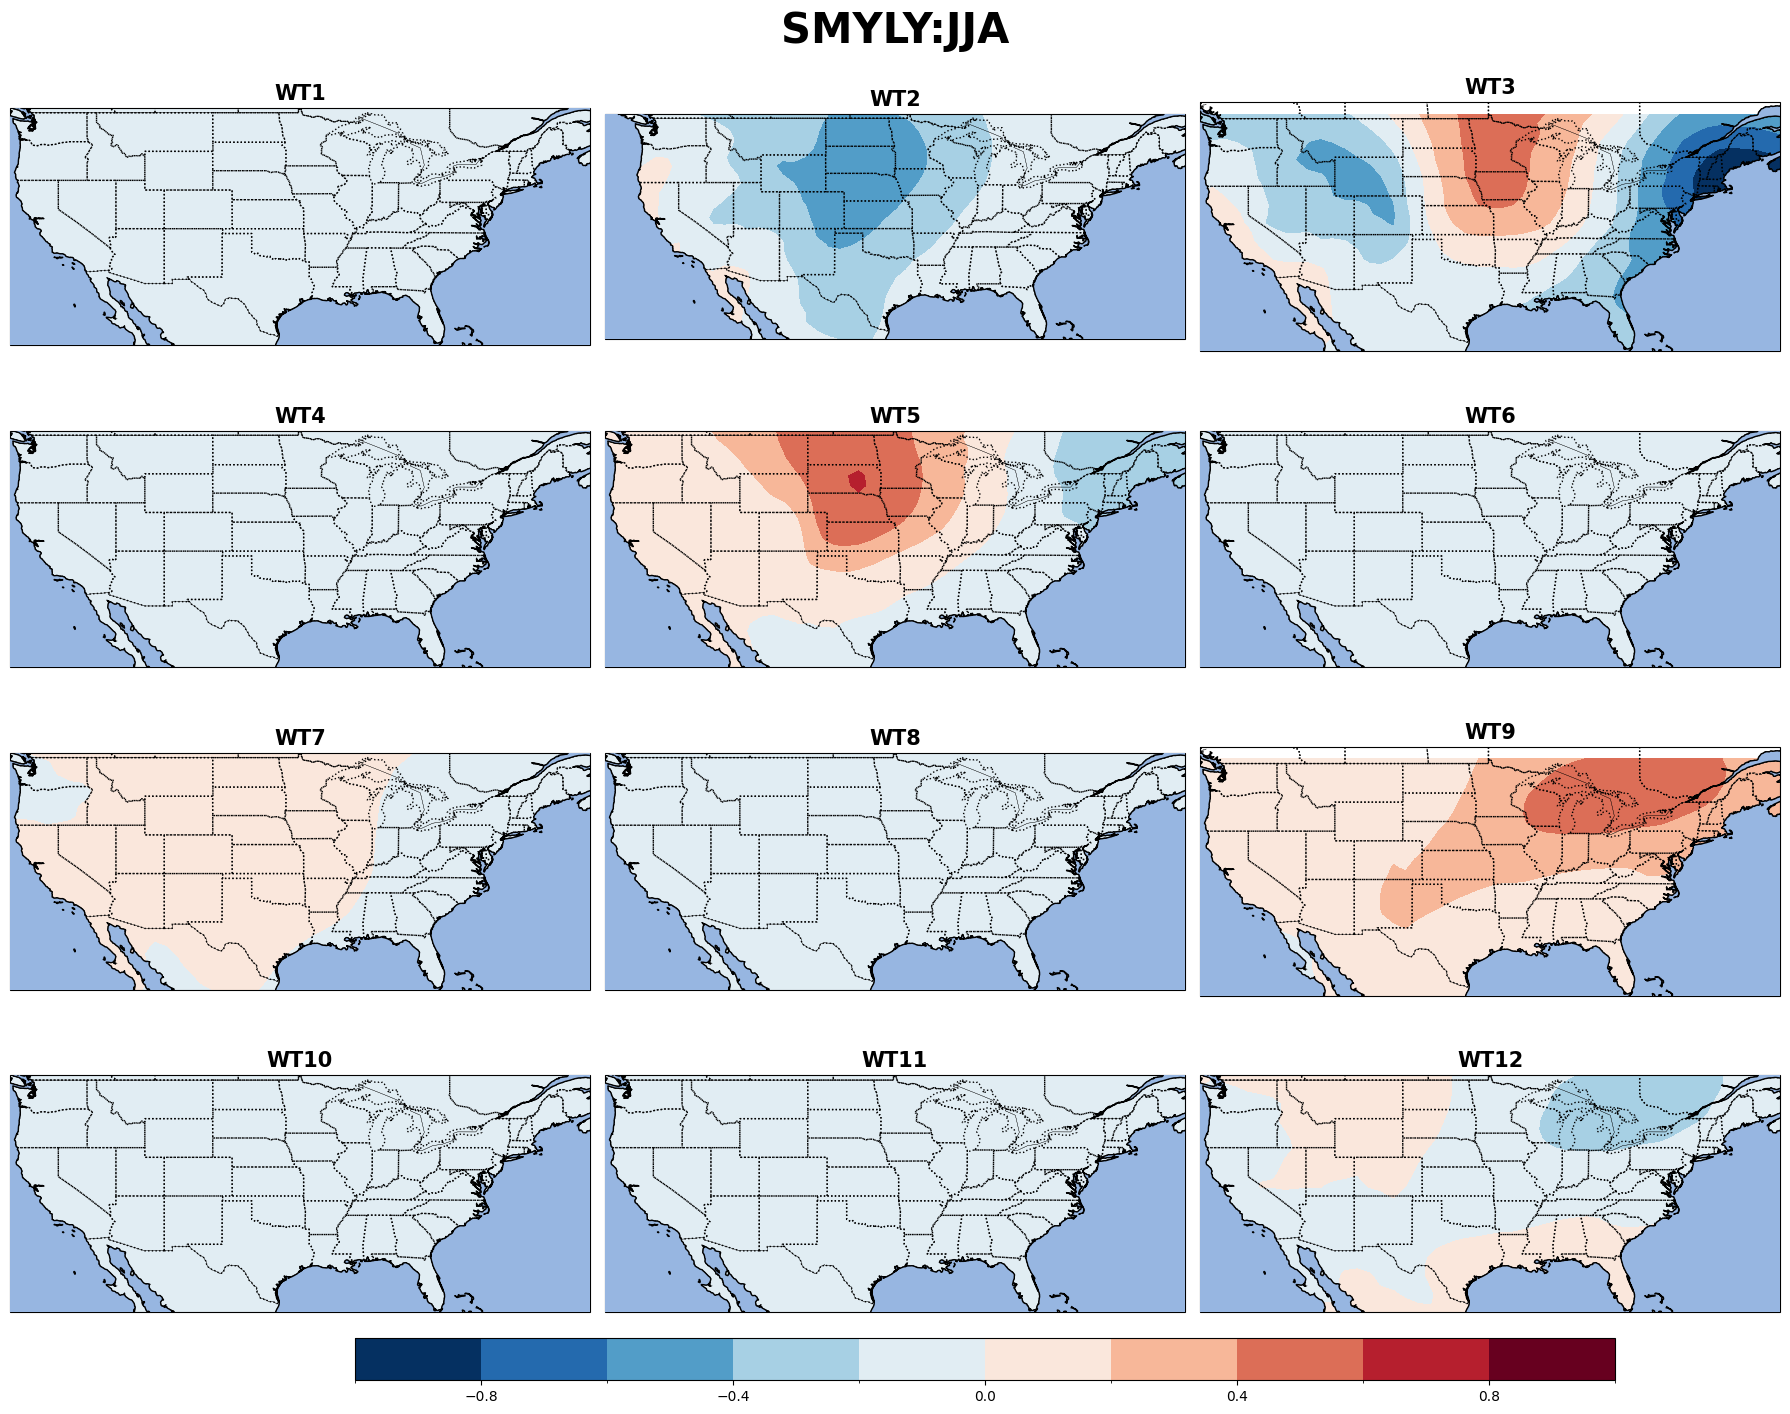

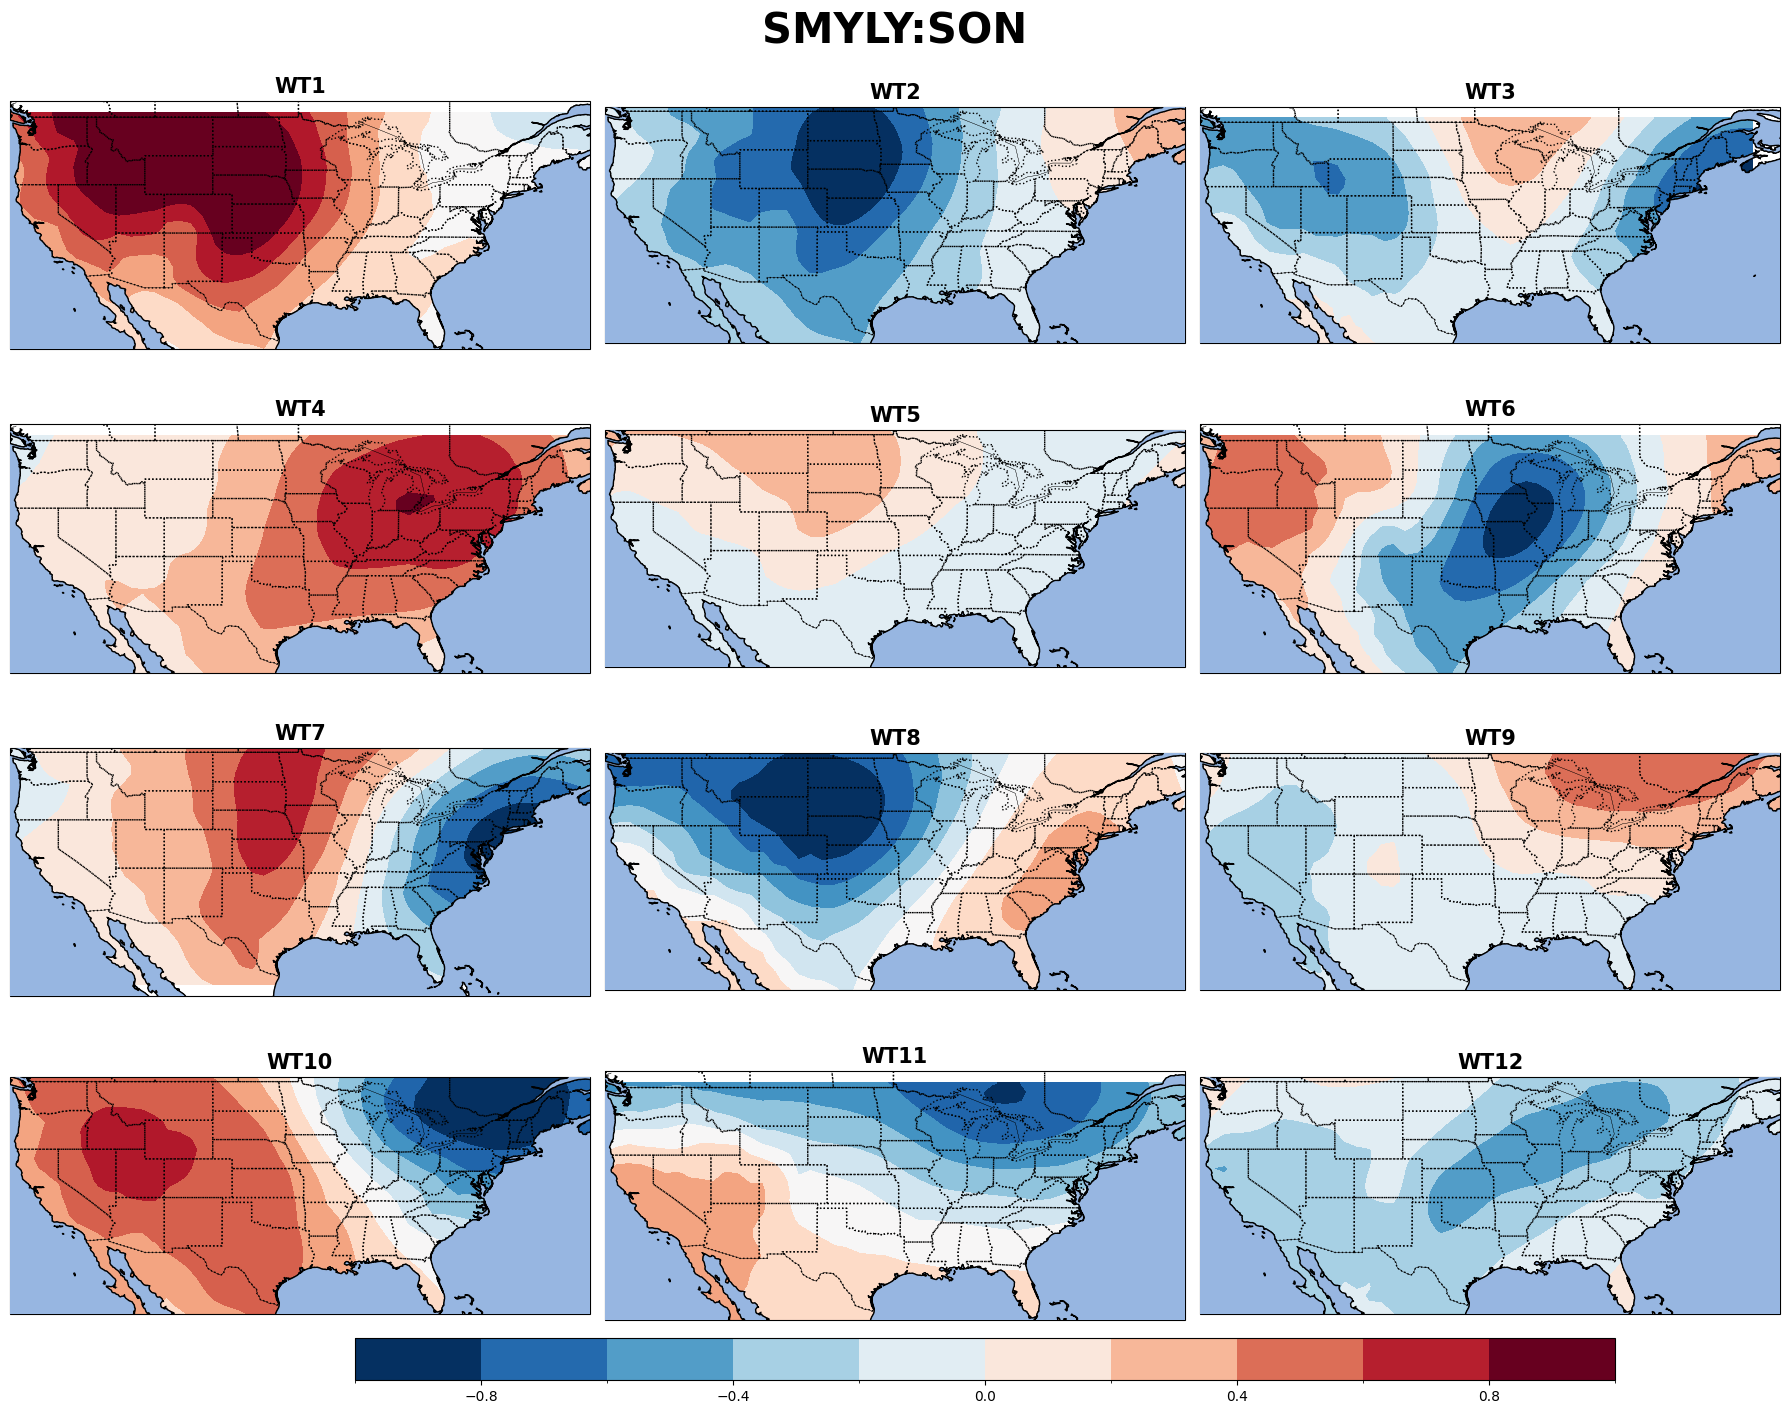

In [21]:
for mem in range(1,21):
    mem_s = str(mem).zfill(3) 
    flnm = dir_wt + 'psl_seasonal_ano_mem' + mem_s + '.nc'
    mem_s = str(mem).zfill(2) 
    with  xr.open_dataset(flnm) as ds:
        # proj = ccrs.PlateCarree(central_longitude=180)
        # longitude from [-180, 180] -> [0,360]
        #ds.coords['longitude'] = xr.where(ds['longitude'] < 0, ds['longitude'] + 360, ds['longitude'])
        #ds = ds.sortby(ds.longitude)
        if mem == 1: 
            z500_wt = ds.__xarray_dataarray_variable__
        else:
            z500_wt = z500_wt + ds.__xarray_dataarray_variable__

season_s = ['DJF','MAM','JJA','SON']            
  
z500_wt = z500_wt/20*100
 
for ns in range(4): 
     plot_prec_12_erai(z500_wt[:,ns], -1, 1, 11, 'RdBu_r', 'horizontal', 'SMYLY:' + season_s[ns]);
    